## Análise exploratória de dados

##### Algumas perguntas que responderemos:
- 1. Quais os valores médios de aluguel por tipo de imóvel?
- 2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [1]:
import pandas as pd

In [3]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Qual o valor médio de aluguel por tipo de imóvel?

In [5]:
dados['Valor'].mean()

12952.659715265761

In [8]:
# Especificando que a média seja calculada unicamente nas colunas numéricas
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [10]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [11]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')



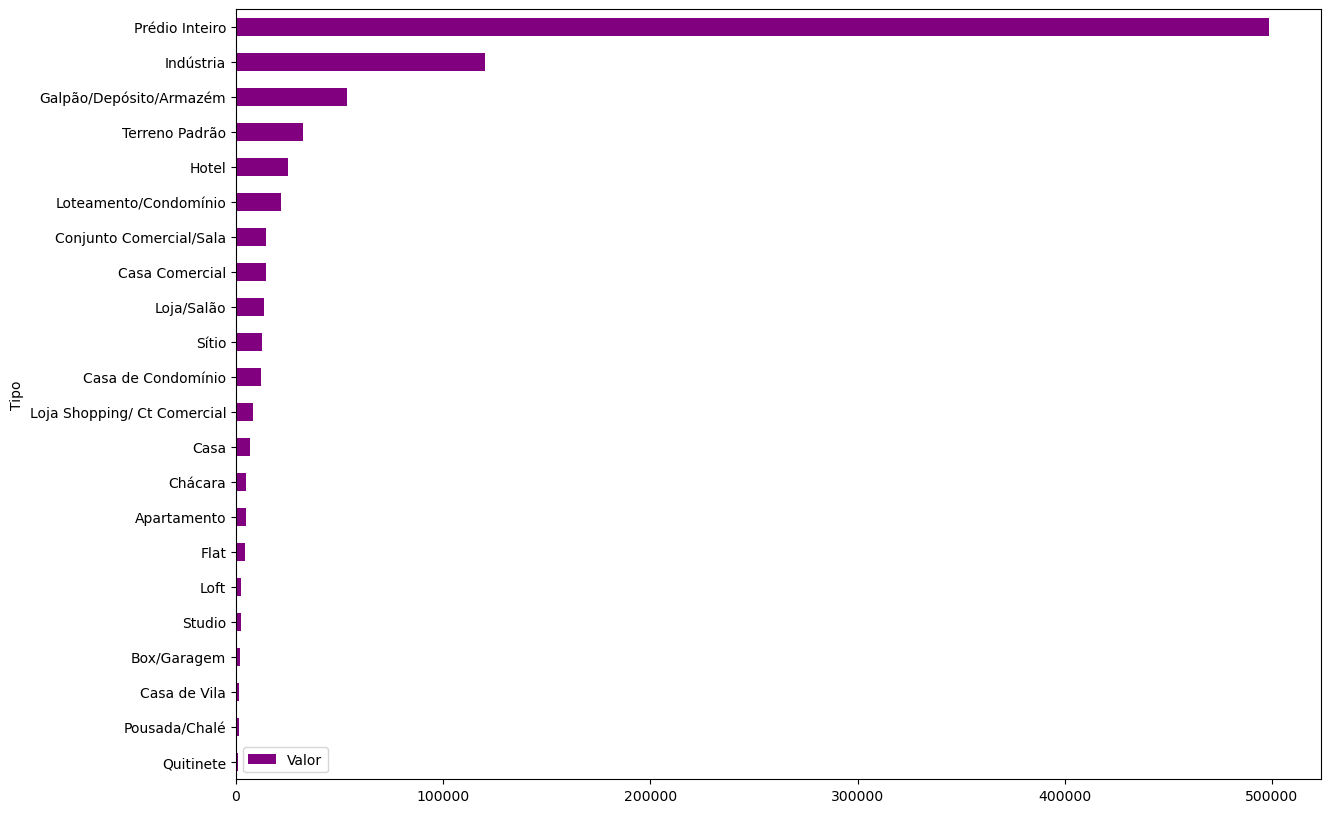

In [13]:
df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='purple');